## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
df.shape

(1460, 81)

## Missing values Count

In [5]:
FWN = [feat for feat in df.columns if df[feat].isnull().sum()>0]
FWN

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
for feat in FWN:
    print(feat,np.round(df[feat].isnull().mean()*100,4),'% missing values')
    

LotFrontage 17.7397 % missing values
Alley 93.7671 % missing values
MasVnrType 0.5479 % missing values
MasVnrArea 0.5479 % missing values
BsmtQual 2.5342 % missing values
BsmtCond 2.5342 % missing values
BsmtExposure 2.6027 % missing values
BsmtFinType1 2.5342 % missing values
BsmtFinType2 2.6027 % missing values
Electrical 0.0685 % missing values
FireplaceQu 47.2603 % missing values
GarageType 5.5479 % missing values
GarageYrBlt 5.5479 % missing values
GarageFinish 5.5479 % missing values
GarageQual 5.5479 % missing values
GarageCond 5.5479 % missing values
PoolQC 99.5205 % missing values
Fence 80.7534 % missing values
MiscFeature 96.3014 % missing values


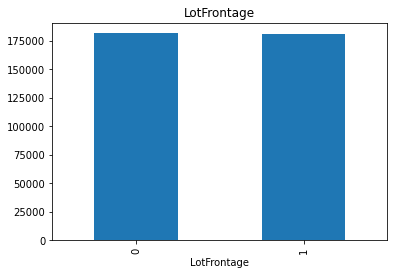

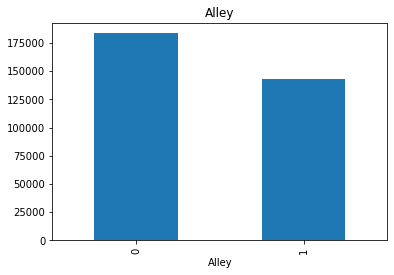

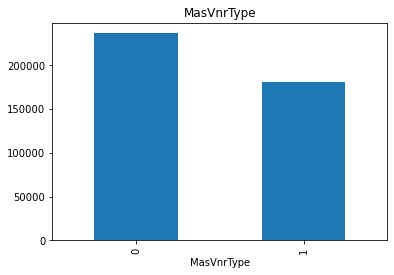

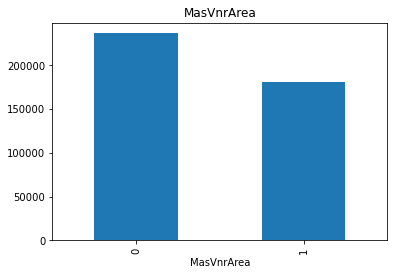

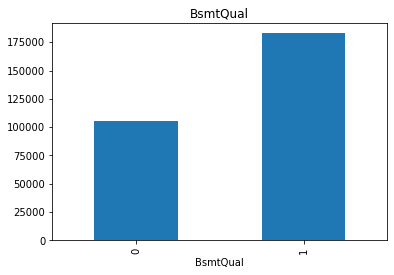

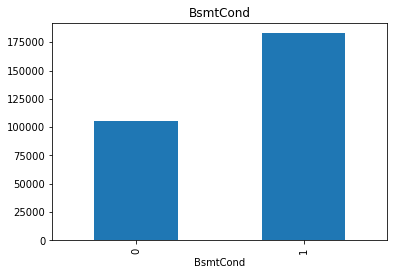

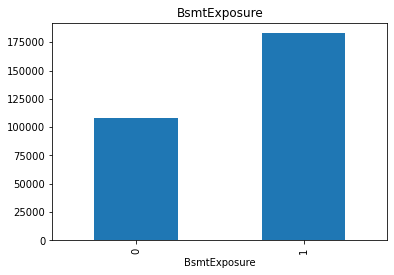

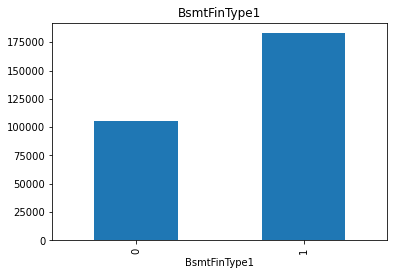

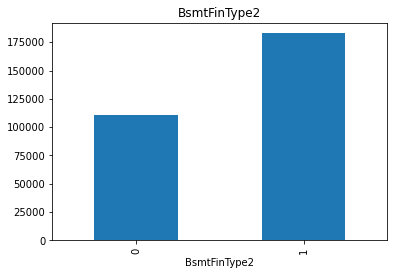

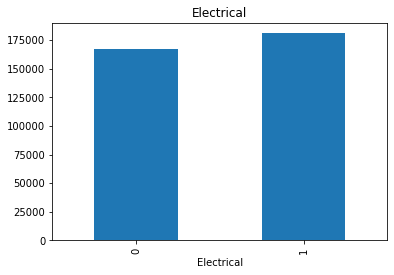

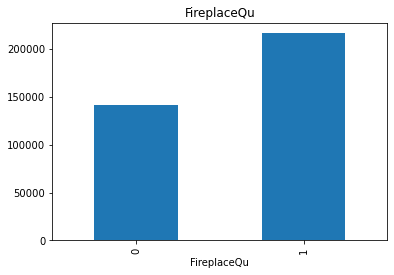

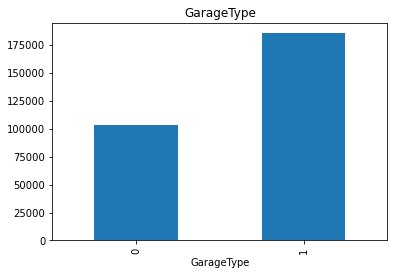

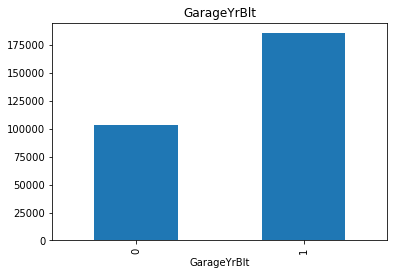

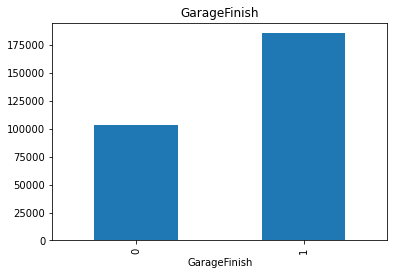

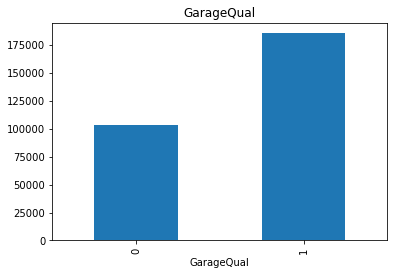

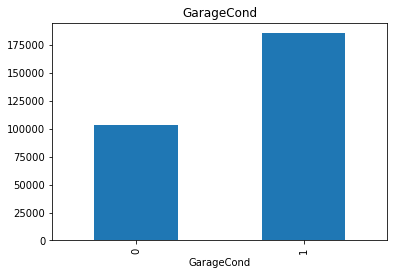

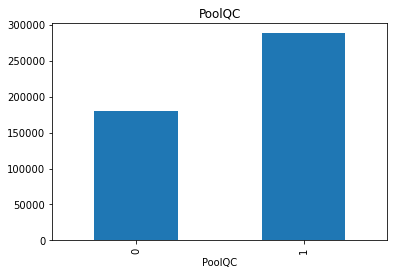

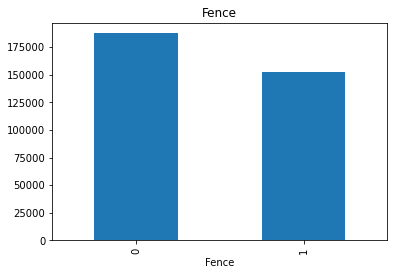

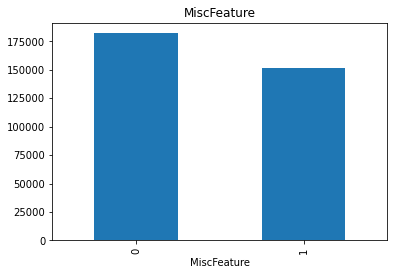

In [7]:
for feat in FWN:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(),0,1)
    data.groupby(feat)['SalePrice'].mean().plot.bar()
    plt.title(feat)
    plt.show()

In [8]:
pd.pandas.set_option('display.max_rows',None)

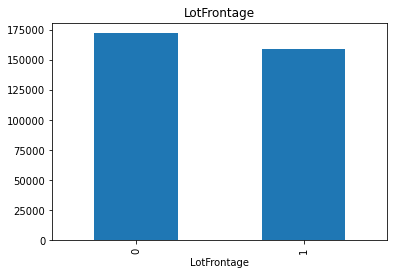

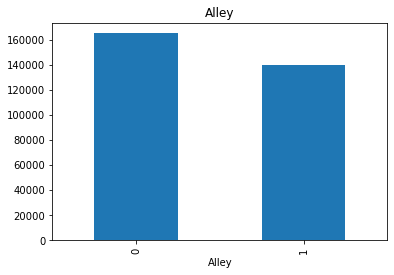

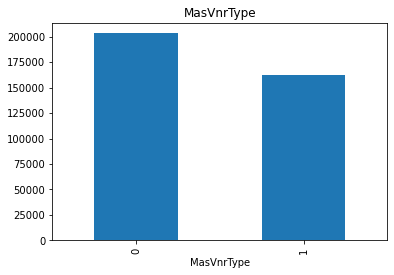

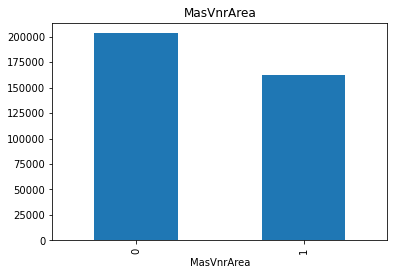

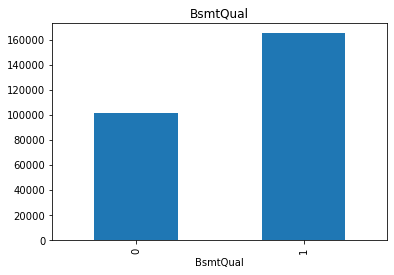

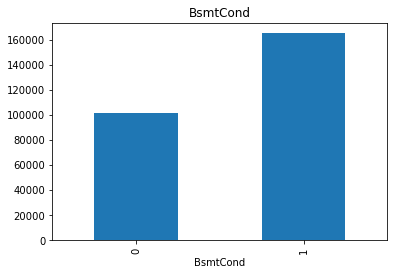

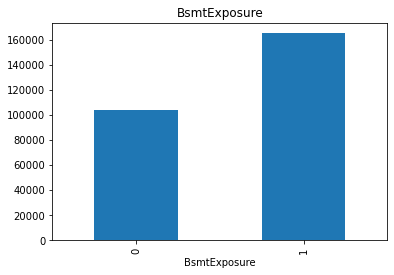

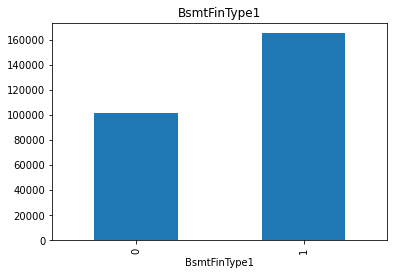

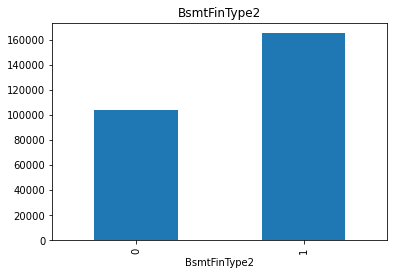

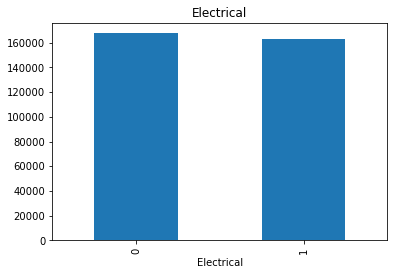

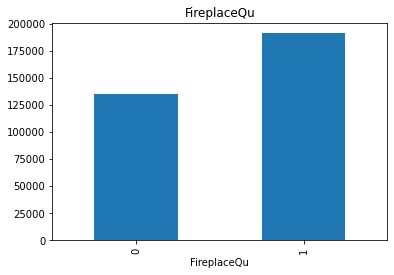

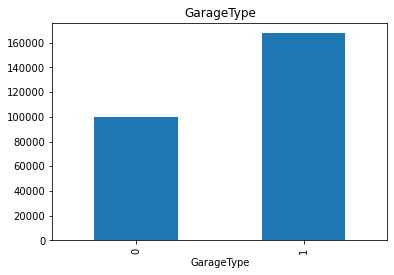

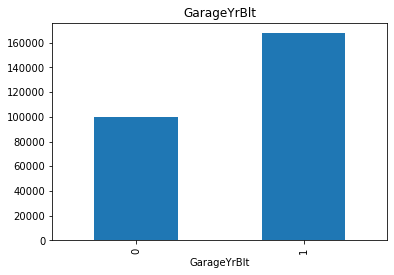

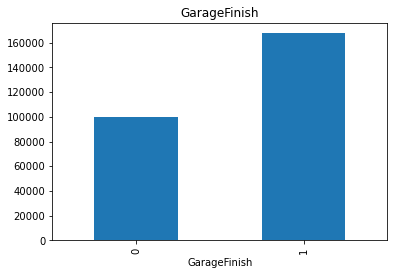

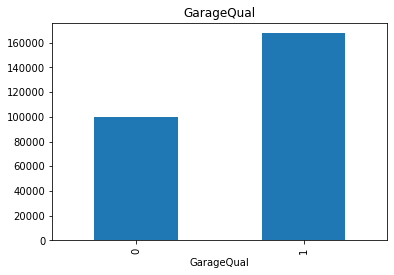

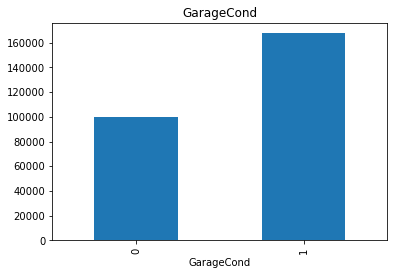

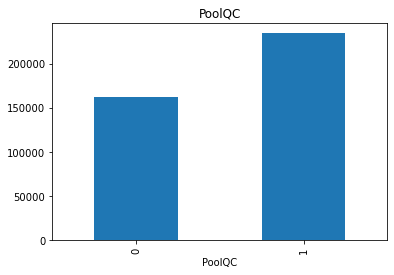

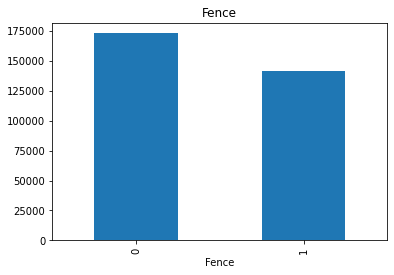

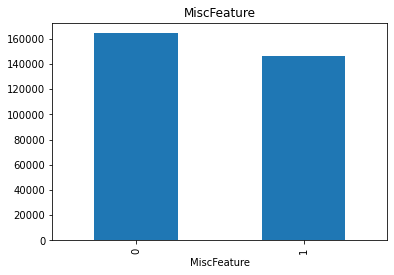

In [9]:
for feat in FWN:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(),0,1)
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()

In [10]:
l=[]
for i in FWN:
    l.append(i)
l

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Numerical Variables

In [11]:
N_F = [N_F for N_F in df.columns if df[N_F].dtypes!='O']
len(N_F)

38

In [12]:
# Seperating continuous and discrete variables
# Year and Non Year 

## Year Variables

In [13]:
YN_F = [YN_F for YN_F in N_F if 'Yr'in YN_F or 'Year' in YN_F]
YN_F

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
for i in YN_F:
    print(i,df[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [15]:
DN_F = [DN_F for DN_F in N_F if df[DN_F].unique().size<25 and DN_F not in YN_F]
DN_F
print(len(DN_F))

17


In [16]:
CN_F = [CN_F for CN_F in N_F if CN_F not in DN_F+YN_F+['Id']]
print(df[CN_F].head(2))
print(len(CN_F))

   LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
16


## EDA of Years

<AxesSubplot:xlabel='YrSold'>

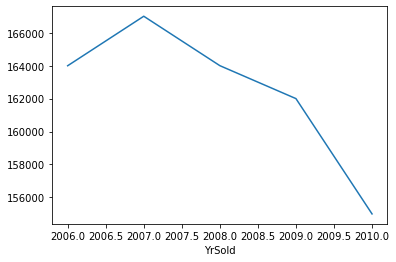

In [17]:
df.groupby('YrSold')['SalePrice'].median().plot()

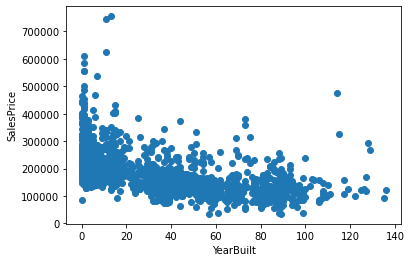

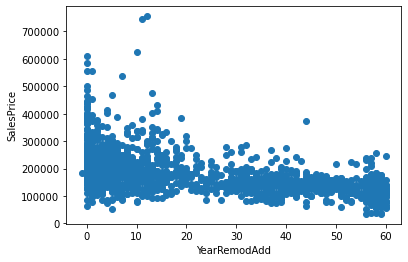

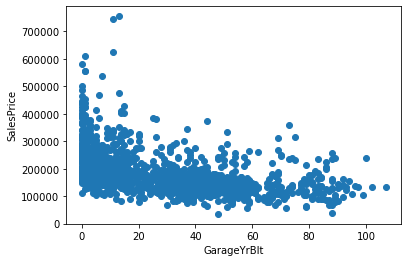

In [18]:
for test in YN_F:
    if test!='YrSold':
        data=df.copy()
        data[test]=data['YrSold']-data[test]
        
        plt.scatter(data[test],data['SalePrice'])
        plt.xlabel(test)
        plt.ylabel('SalesPrice')
        plt.show()


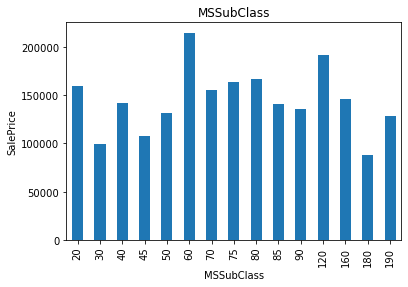

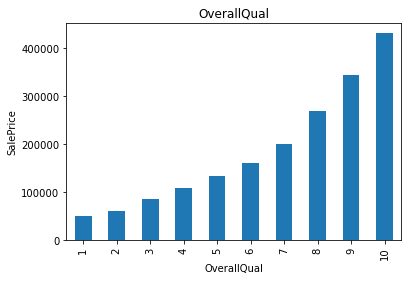

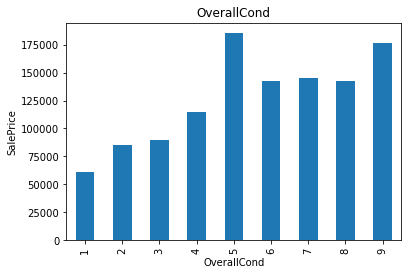

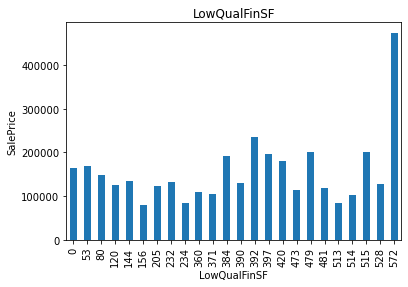

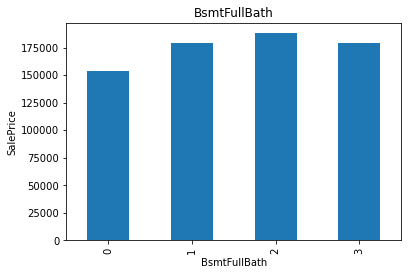

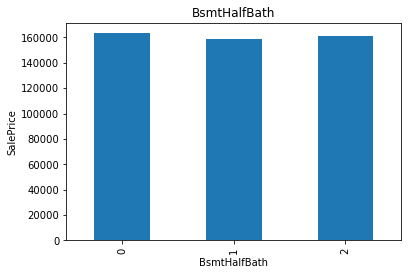

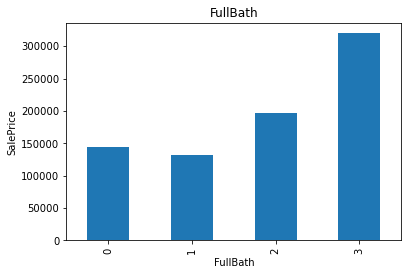

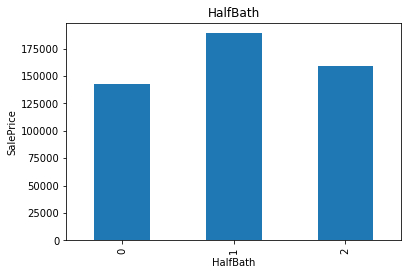

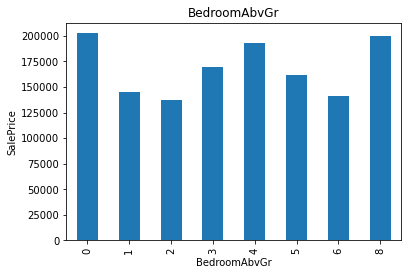

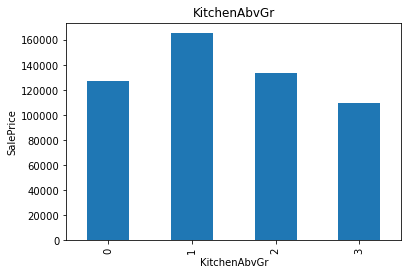

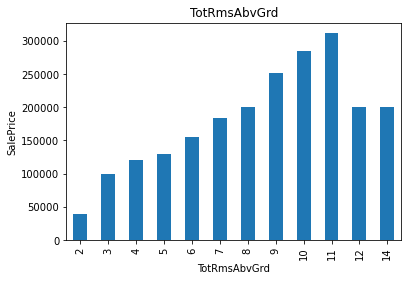

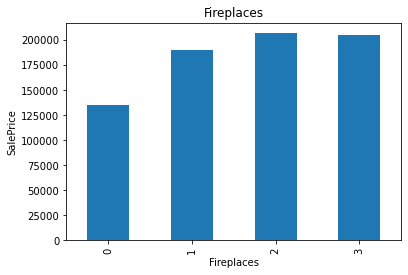

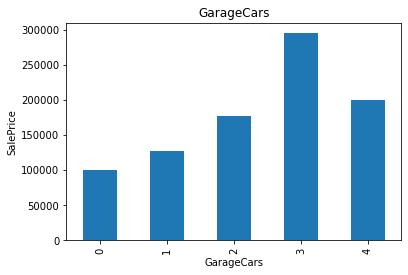

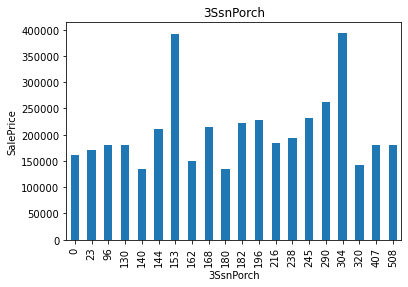

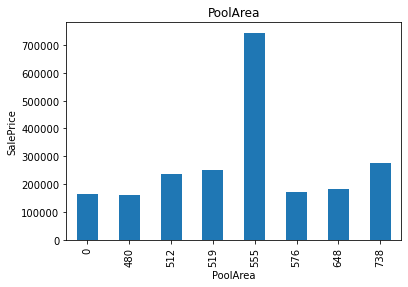

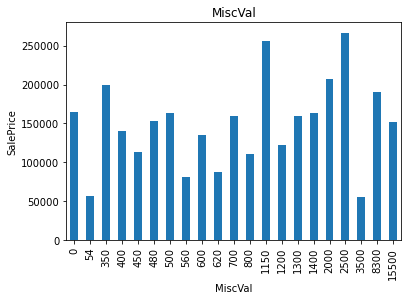

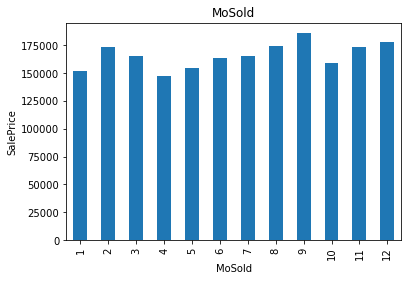

In [19]:
for test in DN_F:
    data=df.copy()
    df.groupby(test)['SalePrice'].median().plot.bar()
    plt.xlabel(test)
    plt.ylabel('SalePrice')
    plt.title(test)
    plt.show()

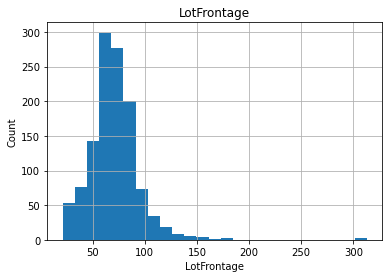

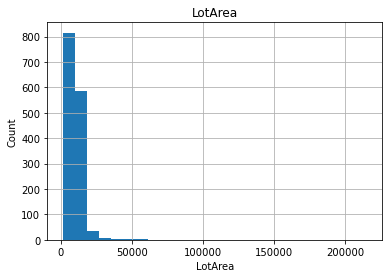

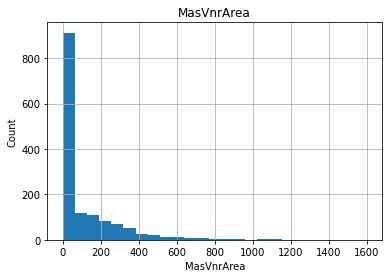

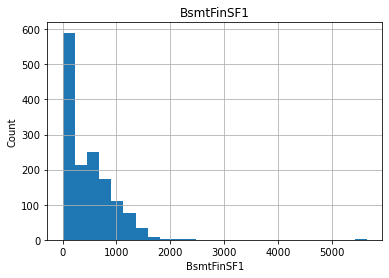

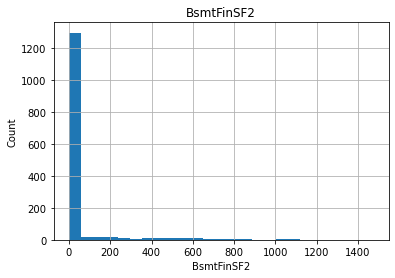

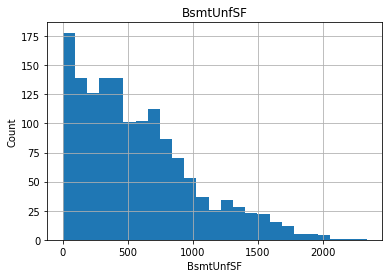

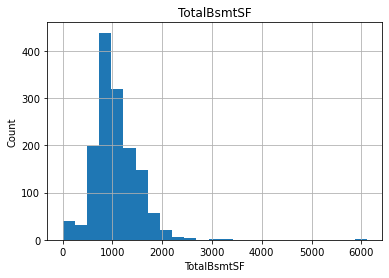

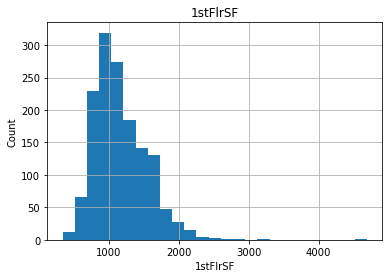

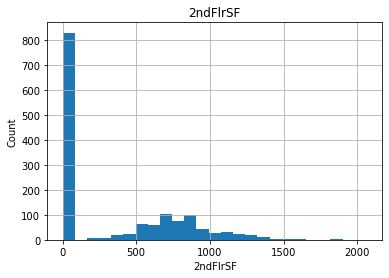

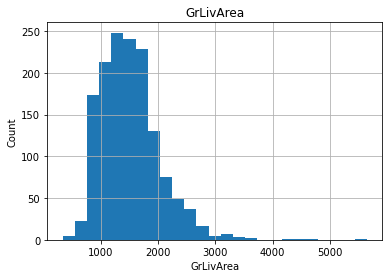

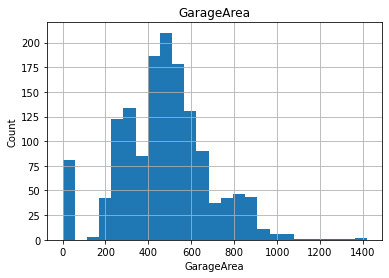

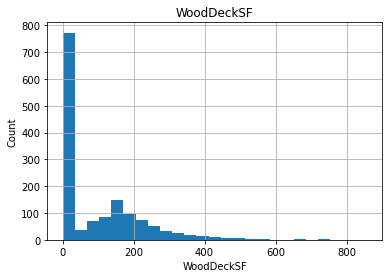

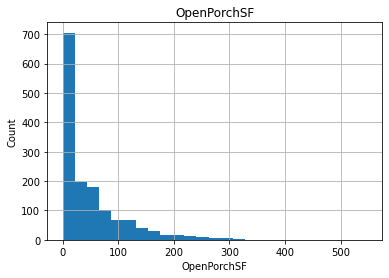

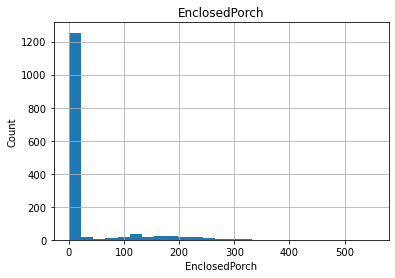

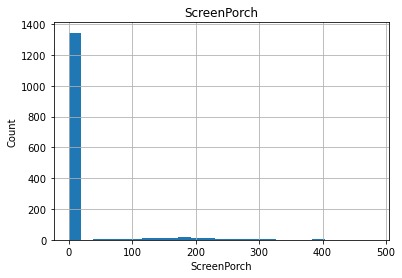

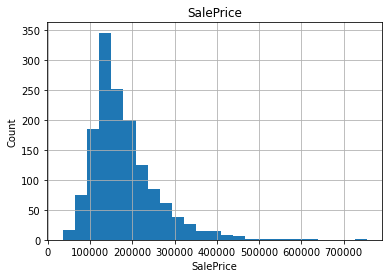

In [20]:
for test in CN_F:
    data=df.copy()
    df[test].hist(bins=25)
    plt.xlabel(test)
    plt.ylabel('Count')
    plt.title(test)
    plt.show()

## Checking for skewed data, 

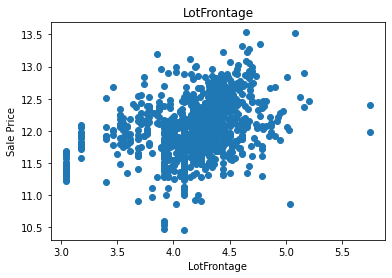

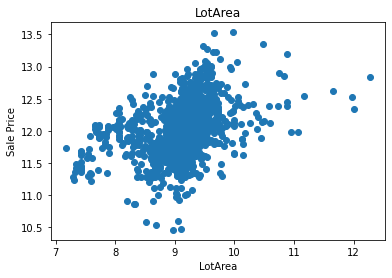

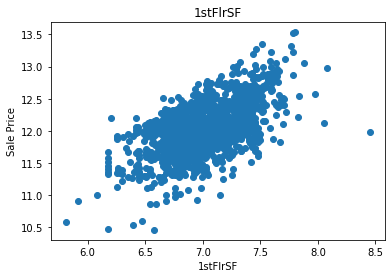

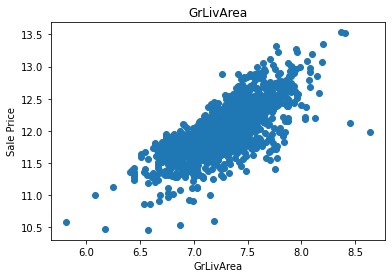

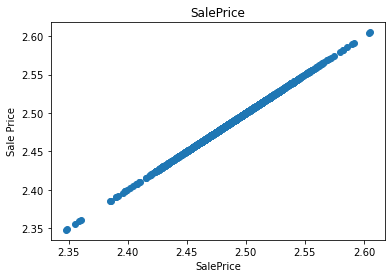

In [29]:
for test in CN_F:
    data= df.copy()
    if 0 in data[test].unique():
        pass
    else:
        data[test] = np.log(data[test])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[test],data['SalePrice'])
        plt.xlabel(test)
        plt.ylabel('Sale Price')
        plt.title(test)
        plt.show()

## Checking of outliers

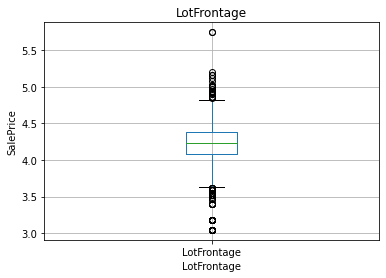

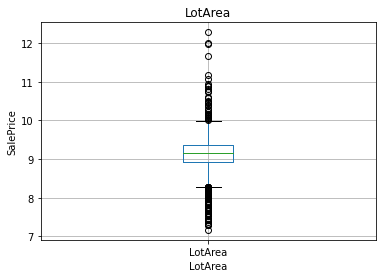

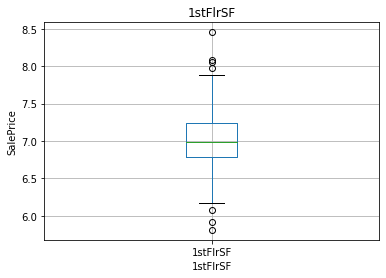

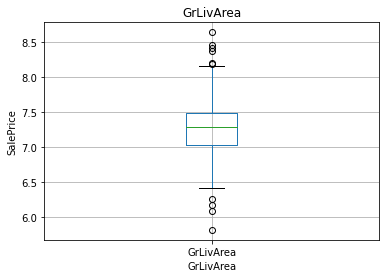

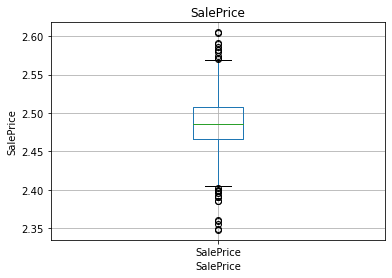

In [30]:
for test in CN_F:
    data=df.copy()
    if 0 in data[test].unique():
        pass
    else:
        data[test]=np.log(data[test])
        data['SalePrice']=np.log(data['SalePrice'])
        data.boxplot(column=test)
        plt.xlabel(test)
        plt.ylabel('SalePrice')
        plt.title(test)
        plt.show()

# Categorical Variables

In [34]:
C_F = [C_F for C_F in df.columns if df[C_F].dtypes=='O']
for test in C_F:
    print('{} has {} Unique Characters'.format(test, len(df[test].unique())))

MSZoning has 5 Unique Characters
Street has 2 Unique Characters
Alley has 3 Unique Characters
LotShape has 4 Unique Characters
LandContour has 4 Unique Characters
Utilities has 2 Unique Characters
LotConfig has 5 Unique Characters
LandSlope has 3 Unique Characters
Neighborhood has 25 Unique Characters
Condition1 has 9 Unique Characters
Condition2 has 8 Unique Characters
BldgType has 5 Unique Characters
HouseStyle has 8 Unique Characters
RoofStyle has 6 Unique Characters
RoofMatl has 8 Unique Characters
Exterior1st has 15 Unique Characters
Exterior2nd has 16 Unique Characters
MasVnrType has 5 Unique Characters
ExterQual has 4 Unique Characters
ExterCond has 5 Unique Characters
Foundation has 6 Unique Characters
BsmtQual has 5 Unique Characters
BsmtCond has 5 Unique Characters
BsmtExposure has 5 Unique Characters
BsmtFinType1 has 7 Unique Characters
BsmtFinType2 has 7 Unique Characters
Heating has 6 Unique Characters
HeatingQC has 5 Unique Characters
CentralAir has 2 Unique Characters
El

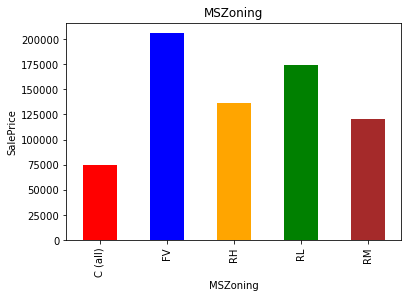

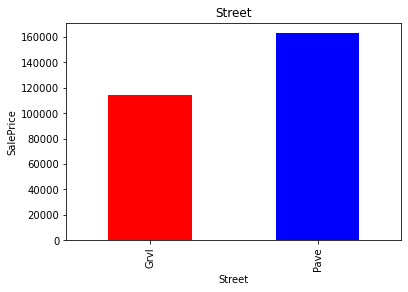

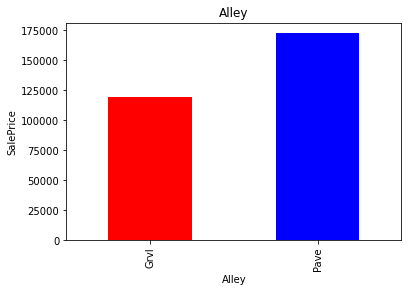

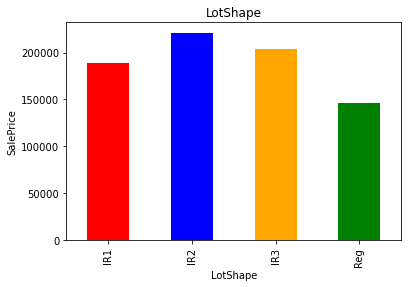

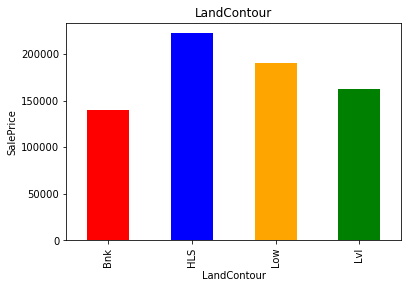

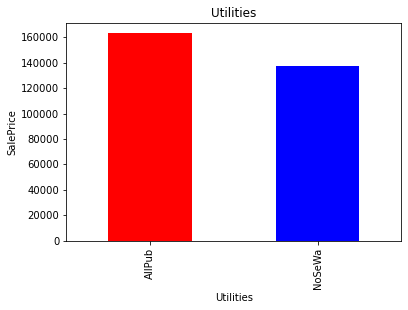

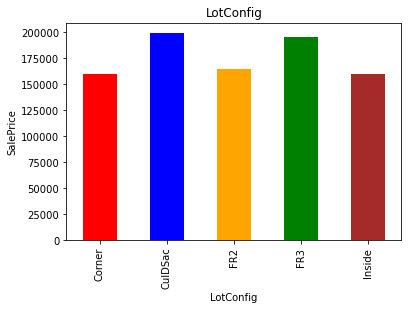

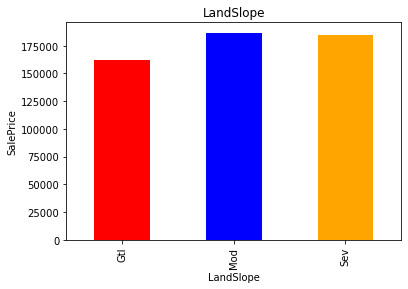

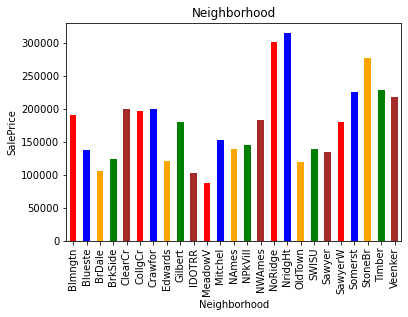

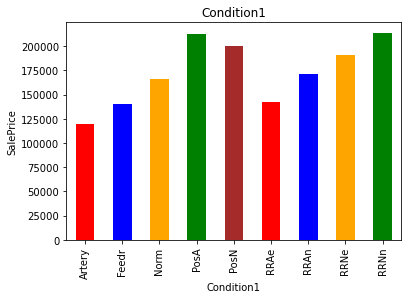

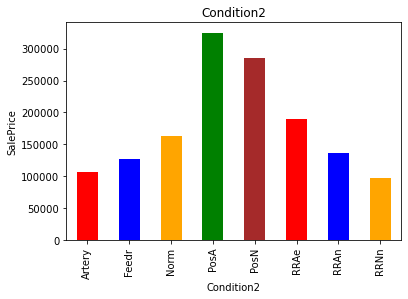

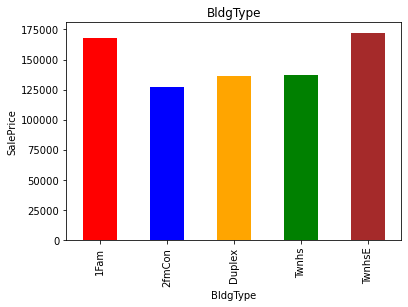

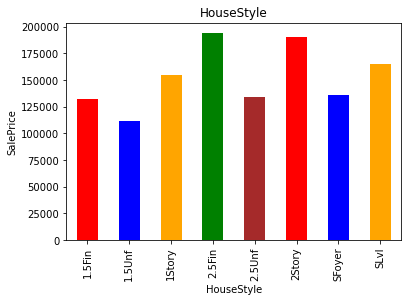

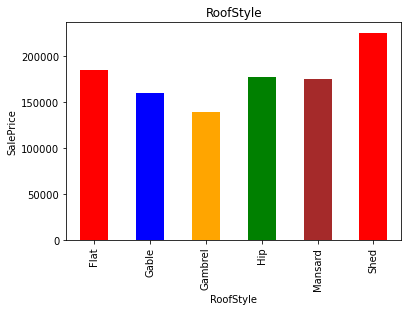

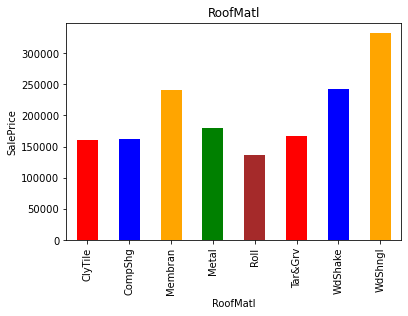

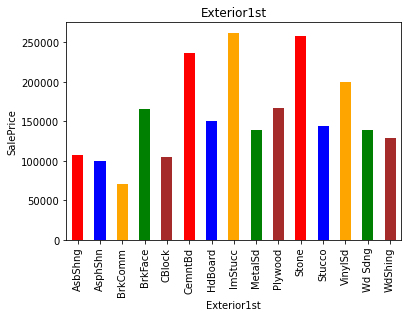

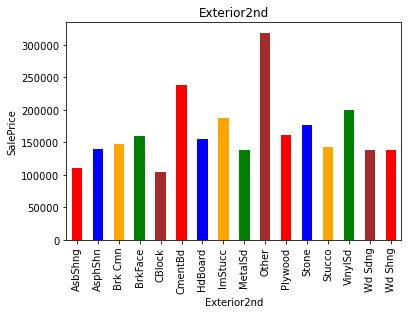

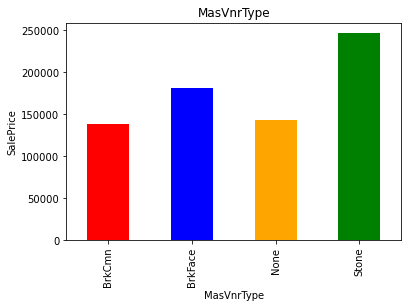

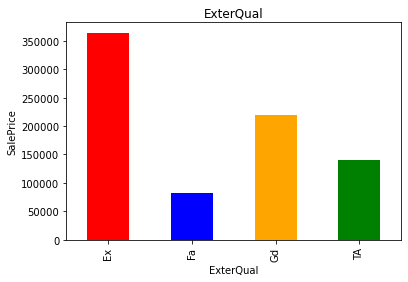

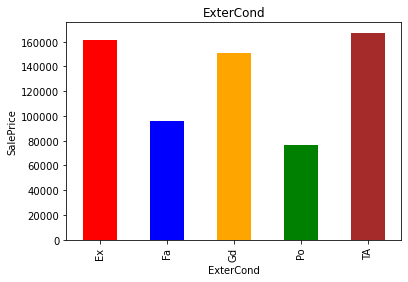

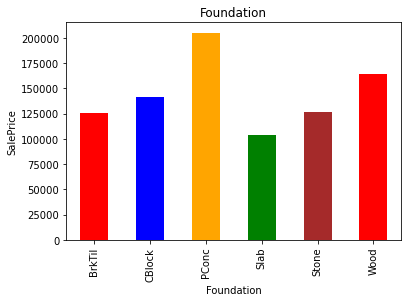

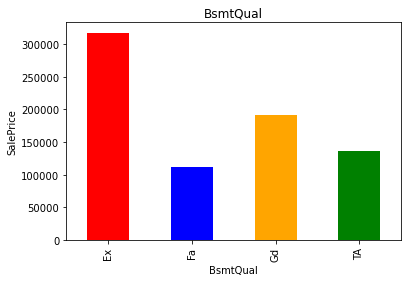

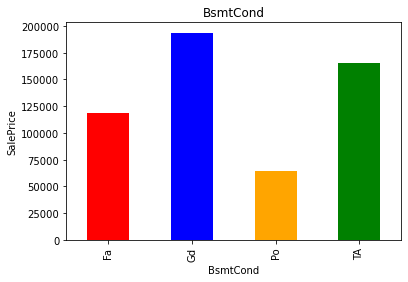

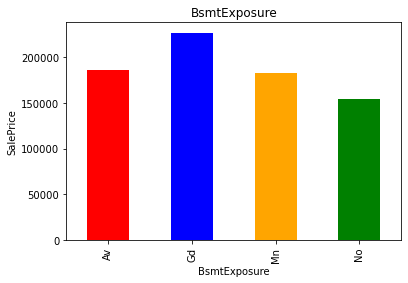

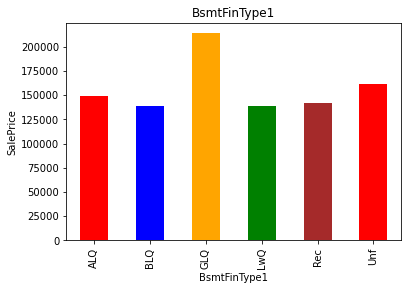

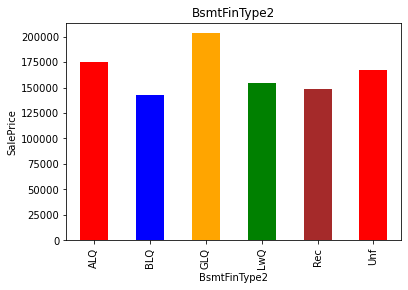

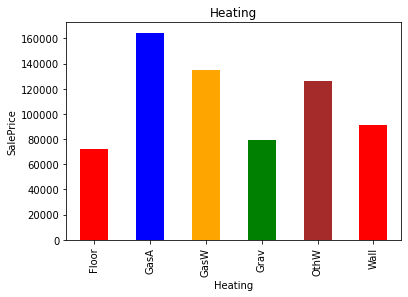

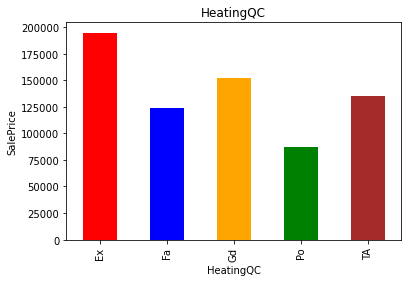

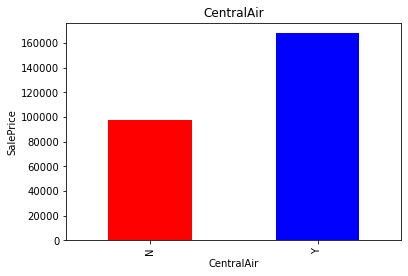

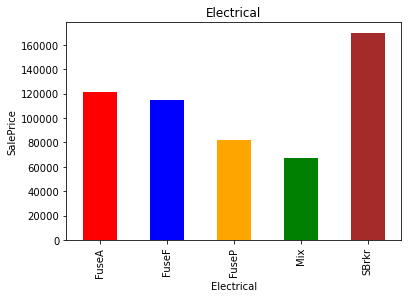

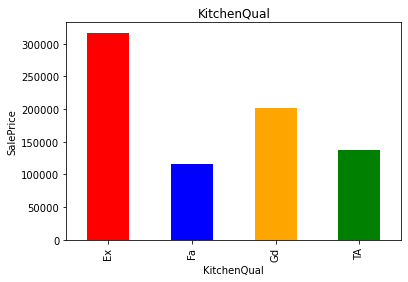

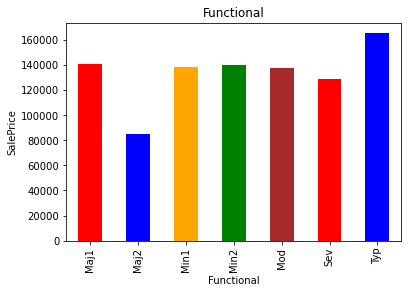

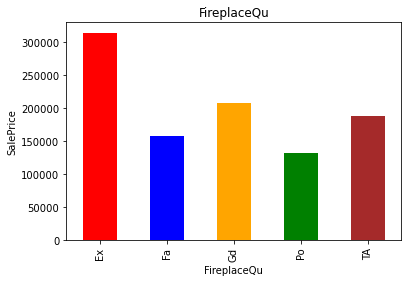

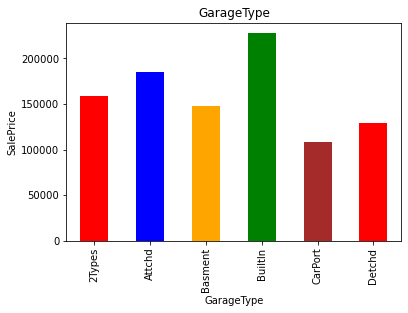

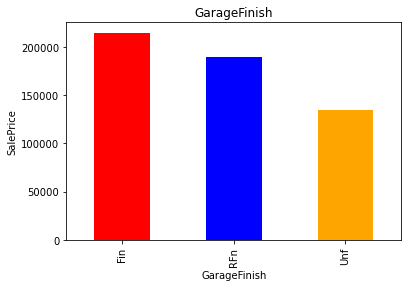

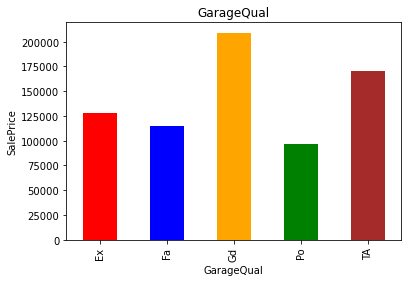

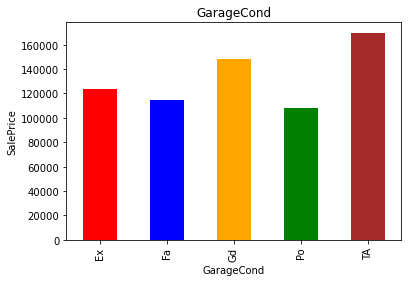

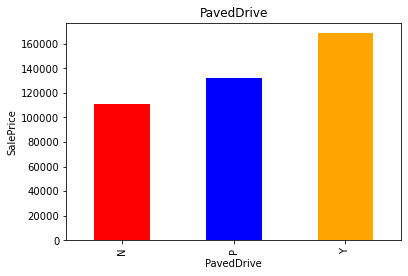

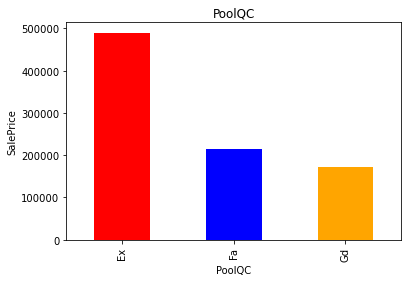

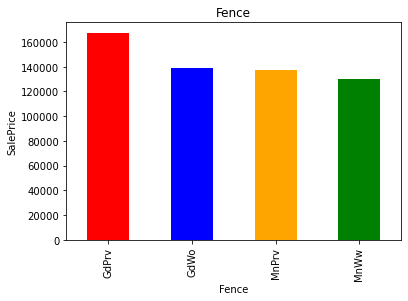

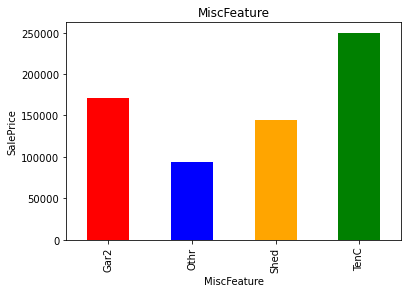

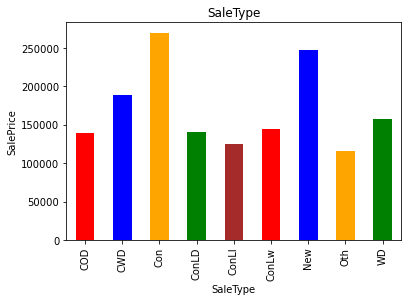

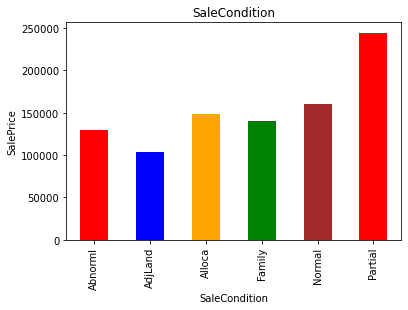

In [53]:
for test in C_F:
    data = df.copy()
    data.groupby(test)['SalePrice'].median().plot.bar(color=['red','blue','orange','green','brown'])
    plt.xlabel(test)
    plt.ylabel('SalePrice')
    plt.title(test)
    plt.show()